# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans

%matplotlib inline


iris = datasets.load_iris()
X = iris.data
y = iris.target

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
X.shape

(150, 4)

In [8]:
init_data = np.random.rand(3,4)
init_data

array([[0.6074271 , 0.78617551, 0.44678923, 0.66179538],
       [0.27874013, 0.16307877, 0.76518951, 0.33905423],
       [0.32592851, 0.72242922, 0.00692121, 0.79161483]])

In [13]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)), # default init = 'kmeans++'
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random')),
             ('k_means_try_init', KMeans(n_clusters=3, init=init_data))]

C:\Users\lic12.LAPTOP-F77RDTU3\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


TypeError: Cannot cast array data from dtype('float64') to dtype('int64') according to the rule 'safe'

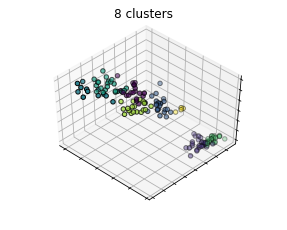

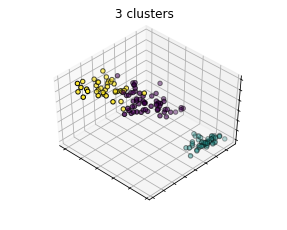

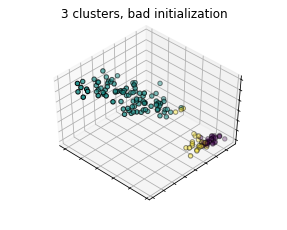

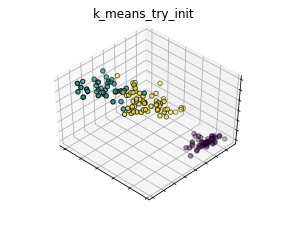

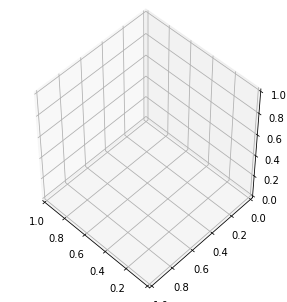

In [12]:
fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization','k_means_try_init']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()

### 使用 sklearn.metrics 的 silhouette_score() 方法，這個數值愈接近 1 表示績效愈好，反之愈接近 -1 表示績效愈差。

In [16]:
from sklearn import cluster, datasets, metrics
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization','k_means_try_init']
for name, est in estimators:
    est.fit(X)
    labels = est.labels_
    # 印出績效
    silhouette_avg = metrics.silhouette_score(X, labels)
    print(name +" : " + str(silhouette_avg))

k_means_8 : 0.34142958047443545
k_means_3 : 0.5528190123564091
k_means_bad_init : 0.5511916046195915
k_means_try_init : 0.5528190123564091


C:\Users\lic12.LAPTOP-F77RDTU3\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


### 如何選擇K

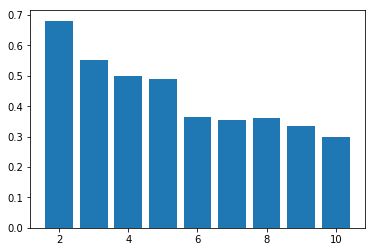

[0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048, 0.3648340039670018, 0.3543964478588638, 0.36179003359737993, 0.3361688008239461, 0.3000542483135054]


In [17]:
# 迴圈
silhouette_avgs = []
ks = range(2, 11)
for k in ks:
    kmeans_fit = cluster.KMeans(n_clusters = k).fit(X)
    cluster_labels = kmeans_fit.labels_
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 作圖並印出 k = 2 到 10 的績效
plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

### 結論 : 2和3的成績最好.